# Import

In [2]:
#region
import matplotlib.pyplot as plt
import math

from sympy import *
import matplotlib.pyplot as plt
from numpy import linspace
import numpy as np
#endregion
t = symbols('t')
f = symbols('f', cls=Function)

# Input

In [3]:
#read input
#region
def ReadArray(f):
    line = f.readline()
    result = list(map(lambda x: float(N(x)), line.split()))
    return result

def ReadMatrix(f):
    listCoef = []
    line = f.readline()
    while(line.strip() != ''):
        coef = list(map(lambda x: float(N(x)), line.split()))
        listCoef.append(coef)
        line = f.readline()
    #print('listCoef: ')
    #print(listCoef)
    return listCoef

def RandN(listCoef):
        # R & N
    R = listCoef[0][0]
    N = math.inf
    for coef in listCoef:
        if(R > coef[0]): R = coef[0]
        coef.pop(0)
        if(N > len(coef)): N = len(coef)
    if R <= 0:
        raise ValueError("invalid input: bán kính <= 0")

    return (R,N)

#endregion

# Hàm chính

In [4]:
def calculate(initial, listCoef, N):
    result = initial              # mảng kết quả c_i
    k=len(listCoef)-1             # mảng mảng hệ số a_i và f
    for n in range(0,N-k):
        c=0
        offset = 1;
        for i in range(n+1,n+k+1): offset *= i
        #start calculating c_{n+k}
        for m in range(0,n+1):
            mult = 1
            for i in range(0,k):
                c += listCoef[i][n-m] * result[m+i] * mult
                mult *= m+i+1
        c= (listCoef[k][n]-c)/offset           # -1*n! / (n+k)!
        result.append(c)
    return result

#Program
def Polynomial(inputPath):
    f = open(inputPath,"r")
    initial = ReadArray(f)
    listCoef = ReadMatrix(f)
    f.close()
    R,N = RandN(listCoef)
    result = calculate(initial, listCoef, N)
    return (R, result)
def Restore(array):
    3

# Plot and save

In [5]:
#region
def Save(result, outputPath, mode):
    f = open(outputPath, mode)
    f.write("Radius of convergence = " + str(result[0]) + ", Result: \n");
    f.write(str(result[1]))
    f.close()

def Plotf(f, interval):
    t_vals = linspace(interval[0], interval[1], 1000)
    lam_x = lambdify(t, f, modules = ['numpy'])
    x_vals = lam_x(t_vals)
    plt.plot(t_vals, x_vals)
    
def Plot(result, start, end, g = None):
    f = 0
    power = 0
    for i in result:
        f += i * (t ** power)
        power += 1
    Plotf(f, (start, end))
    if g is not None:
        Plotf(g, (start, end))
    return f
#endregion

#Frobenius

# Test

In [6]:
test1 = 'example1.txt'
test2 = 'example2.txt'

output = 'outputPath_1.txt'

Radius of convergence =  8.0 , Result:
[ 0.0e+00  3.0e+00  0.0e+00 -4.5e+00  0.0e+00  2.0e+00  0.0e+00 -4.3e-01
 -8.7e-17  5.4e-02]
0.054*t**9 - 8.7e-17*t**8 - 0.43*t**7 + 2.0*t**5 - 4.5*t**3 + 3.0*t


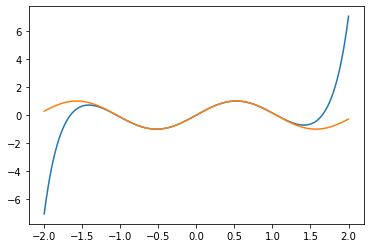

In [10]:
R, array = Polynomial(test1)
print("Radius of convergence = " ,str(R), ", Result:")
np.set_printoptions(precision=1)
print(np.array(array))

f = Plot(array, -2 , 2, g = sin(3*t))
print(f.evalf(2))
Save((R,array),output,"w")

Radius of convergence = 8.0, Result: 

[0.0, 1.0, 0.0, -0.5, 0.0, 0.125, 0.0, -0.020833333333333332, 0.0, 0.0026041666666666665, 0.0, -0.00026041666666666666, 0.0, 2.170138888888889e-05, 0.0, -1.5500992063492063e-06, 0.0, 9.68812003968254e-08, 0.0]


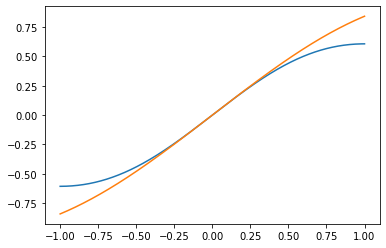

In [8]:
R, array = Polynomial(test2)

print("Radius of convergence = " + str(R) + ", Result: \n")
print(array)

Plot(array, -1 , 1, g = sin(t))
Save((R,array),output,"w")


2*t + 1

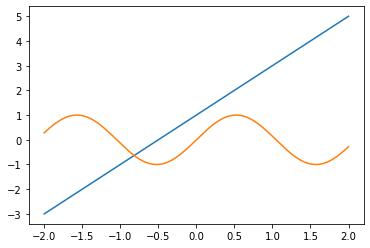

In [9]:
Plot([1,2], -2 , 2, g = sin(3*t))